# Clase 5. Integrales

Para obtener un mejor resultado en la integracion es mejor utilizar la aproximacion de segundo orden y con varias variables. Como vimos en clase:
$$
\vec{y}_{n+1} = \vec{y}_n + h \vec{f}(x_n,y_n) + \frac{1}{2} h^2 \left( \frac{\partial \vec{f}}{\partial x} + \mathbb{J}(\vec{f}(x_n,y_n)) \cdot \vec{f}(x_n,y_n) \right) 
$$
El segundo termino es la aprox de Euler. El jacobiano evaluado en $x_n, y_n$ y el orden del error es $\mathcal{O}(h^2)$

Buscar: Integrales de Picard

Por otro lado, usando taylor tenemos:
$$f(x_0+h)=f(x_0)+ f'(x_0)h+ \frac{f''(x_0)h^2}{2!}+ \frac{f'''(x_0)h^3}{3!} \dots(1)$$ 
$$f(x_0-h)=f(x_0)- f'(x_0)h+ \frac{f''(x_0)h^2}{2!}- \frac{f'''(x_0)h^3}{3!} \dots(2)$$

(1) + (2)=

(1) - (2)=

Entonces:
$$
f(x)=\frac{f(x_0+h)+f(x_0-h)}{2} + \frac{f(x_0+h)+f(x_0-h)}{2h} + O(h^2)
$$
Siempre y cuando $x \in (x_0-h, x_0+h)$

Por lo que:
$$
\int\limits_{-h}^{h}f(x)= (f(x_0+h)+f(x_0-h))h + O(h)
$$

Muchas cosas que luego tendre que saber como se hacen...
Solo sobreviven los terminos constante y la segunda derivada

$$ \int\limits_{-h}^{h}f(x)dx= \frac{h}{9}\left( -2f_{i+2} + 11f_{i+1} + 11f_{i-1}-2f_{1-2} + \mathcal{O}(h^3) \right) $$

In [32]:
from pylab import *
%matplotlib inline

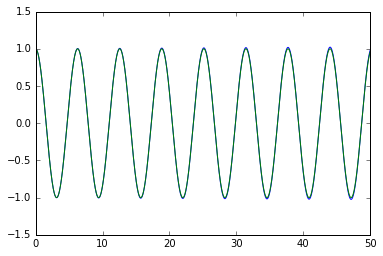

In [33]:
#Asi solo es euler. Mas adelante ya es otro metodo
#Se deja asi solo para ilustrar como va el codigo

def integra2(ec,d_ec,p_ini,x,h=0.1):
    #f=ec(p_ini)
    #df = d_ec(p_ini)[0]
    #Jac = d_ec(p_ini)[0]
    tiempos = arange(x[0], x[1]+h,h)
    sol = zeros((len(tiempos),len(p_ini)))
    sol[0,:] = p_ini
    for i in xrange(len(tiempos)-1): #xrange hace lo mismo que range pero va eliminando los valores.
                                     #a diferencia del range que si da toda la lista y ocupa un buen de memoria.
                                     #ES MAS RAPIDO
                                     #Se recomienda para cualquier for de mas de 100
        f=ec(sol[i,:],tiempos[i])
        sol[i+1,:]=sol[i,:]+h*f
    return tiempos, sol

def prueba(y,t):
    return array([y[1],-y[0]])
                
t,y = integra2(prueba,0,[1,0],[0,50], 0.001) #[0,1] tiempo inicial y final
#print y
plot(t,y[:,0],t,cos(t))

In [34]:
a=array([2,6])
b=[2,6]
print a,b
print 2*a, 2*b

[2 6] [2, 6]
[ 4 12] [2, 6, 2, 6]


In [35]:
A = array([[1,0],[0,1]])
B = matrix([[1,0],[0,1]]) #Matrix no es una matriz => "This is not a spoon"
print A
print A2
print A*a
print dot(B,a)

[[1 0]
 [0 1]]


NameError: name 'A2' is not defined

In [ ]:
A = array([[1,2],[3,4]])
a = array([6,7])
print A[0,0],A[0,1],A[1,0],A[1,1]
print A*a
print dot(A,a) #Los dos son arreglos. Esto es lo que hay que hacer

In [ ]:
x = zeros((2,6)) #Esto es un array
print x
x[1,1]=3
x[0,1]=9
print x
print x[:,1] #Dos puntitos son todos los elementos
print type(x)

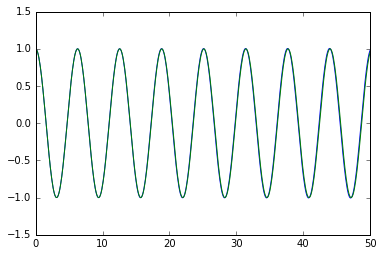

In [36]:
#Ahora si agregamos jacobiano

def integra2(ec,d_ec,p_ini,x,h=0.1):
    tiempos = arange(x[0], x[1]+h,h)
    sol = zeros((len(tiempos),len(p_ini)))
    sol[0,:] = p_ini
    for i in xrange(len(tiempos)-1): #xrange hace lo mismo que range pero va eliminando los valores.
                                     #a diferencia del range que si da toda la lista y ocupa un buen de memoria.
                                     #ES MAS RAPIDO
                                     #Se recomienda para cualquier for de mas de 100
        f = ec(sol[i,:],tiempos[i])
        df,jac = d_ec(sol[i,:],tiempos[i])
        sol[i+1,:]=sol[i,:]+h*f+(0.5*h*h*(df+dot(jac,f)))
    return tiempos, sol

def prueba(y,t):
    return array([y[1],-y[0]])

def d_prueba(y,t):
    return array([0,0]),array([[0,1],[-1,0]])
                
t,y = integra2(prueba,d_prueba,[1,0],[0,50], 0.1) #[0,1] tiempo inicial y final
#print y
plot(t,y[:,0],t,cos(t))

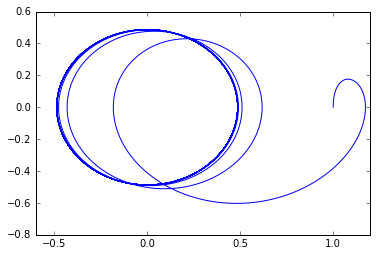

In [37]:
def p(y,t):
    return array([y[1],-2*y[1]-0.5*sin(y[0])+cos(t)])

def dp(y,t):
    return array([0,cos(t)]),array([[0,1],[-0.5*cos(y[0]),-2]])

t,y= integra2(p,dp,[1,0],[0,100],0.01)
plot(y[:,0],y[:,1])

In [41]:
def rk(ec,p_ini,x,h=0.01):
    tiempos = arange(x[0], x[1]+h,h)
    sol = zeros((len(tiempos),len(p_ini)))
    sol[0,:] = p_ini
    for i in xrange(len(tiempos)-1):
        k=h*ec(sol[i,:],tiempos[i])
        f=ec(sol[i,:]+0.5*k,tiempos[i]+0.5*h)
        sol[i+1,:] = sol[i,:] + h*f
    return tiempos, sol

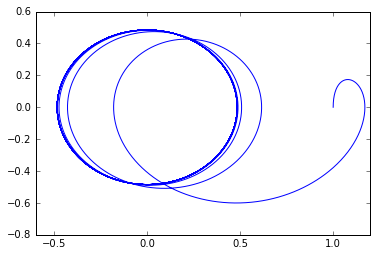

In [42]:
t,y= rk(p,[1,0],[0,100],0.01)
plot(y[:,0],y[:,1])